In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from joblib import dump

In [104]:
filename = 'Nómadas digitales y viajeros incondicionales (Responses) - Form Responses 1.csv'
df_raw = pd.read_csv(filename, usecols=range(1,5))
df_raw.head(10)

,¿Qué actividades deportivas te gusta practicar?,¿Cuáles son tus actividades culturales favoritas?,¿Qué tipo de comida te gusta?,"Además, en tu tiempo de ocio te gusta..."
0,"Surf, Running, Climbing","Concerts, Theaters, Parks, Museums, Bookstores...","Sushi, Italian, Mediterranean","Coffee, Parties, Drinks at night"
1,"Fitness, Climbing, Football","Concerts, Parks, Movies","Burgers, Italian, Chinese","Coffee, Sunsets"
2,"Fitness, Football, Running","Bookstores, Museums, Rural tourism, Parks, Gui...","Mediterranean, Chinese, Italian, Burgers",Sunsets
3,"Trecking, Paddle","Rural tourism, Guided visits, Concerts","Mediterranean, Sushi, Italian, Burgers","Sunsets, Parties, Drinks at night, Coffee"
4,Fitness,"Rural tourism, Movies, Concerts","Burgers, Mediterranean","Drinks at night, Parties"
5,"Paddle, Fitness","Movies, Parks, Concerts, Guided visits","Chinese, Mediterranean, Burgers, Italian","Drinks at night, Coffee, Parties, Sunsets"
6,"Trecking, Running","Rural tourism, Movies, Concerts","Italian, Mediterranean, Sushi","Coffee, Parties, Sunsets"
7,"Surf, Running","Concerts, Movies, Rural tourism, Bookstores","Italian, Sushi, Mediterranean, Burgers","Parties, Sunsets, Drinks at night, Coffee"
8,"Running, Paddle","Parks, Movies","Chinese, Sushi, Italian, Indian, Mediterranean...","Drinks at night, Parties, Sunsets"
9,"Trecking, Voley, Running","Rural tourism, Museums, Guided visits, Parks","Italian, Burgers, Mediterranean, Indian, Sushi","Coffee, Sunsets, Parties, Drinks at night"


In [106]:
df_ohe = df_raw.copy()
for col in df_raw.columns:
    df_ohe = df_ohe.join(df_ohe.pop(col).str.get_dummies(', '))
    
df_ohe.head(3)

,Climbing,Fitness,Football,Paddle,Running,Surf,Trecking,Voley,Bookstores,Concerts,...,Burgers,Chinese,Indian,Italian,Mediterranean,Sushi,Coffee,Drinks at night,Parties,Sunsets
0,1,0,0,0,1,1,0,0,1,1,...,0,0,0,1,1,1,1,1,1,0
1,1,1,1,0,0,0,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
2,0,1,1,0,1,0,0,0,1,0,...,1,1,0,1,1,0,0,0,0,1


In [111]:
print('Número de columnas:', len(df_ohe.columns))
df_ohe.columns

Número de columnas: 26


Index(['Climbing', 'Fitness', 'Football', 'Paddle', 'Running', 'Surf',
       'Trecking', 'Voley', 'Bookstores', 'Concerts', 'Guided visits',
       'Movies', 'Museums', 'Parks', 'Rural tourism', 'Theaters', 'Burgers',
       'Chinese', 'Indian', 'Italian', 'Mediterranean', 'Sushi', 'Coffee',
       'Drinks at night', 'Parties', 'Sunsets'],
      dtype='object')

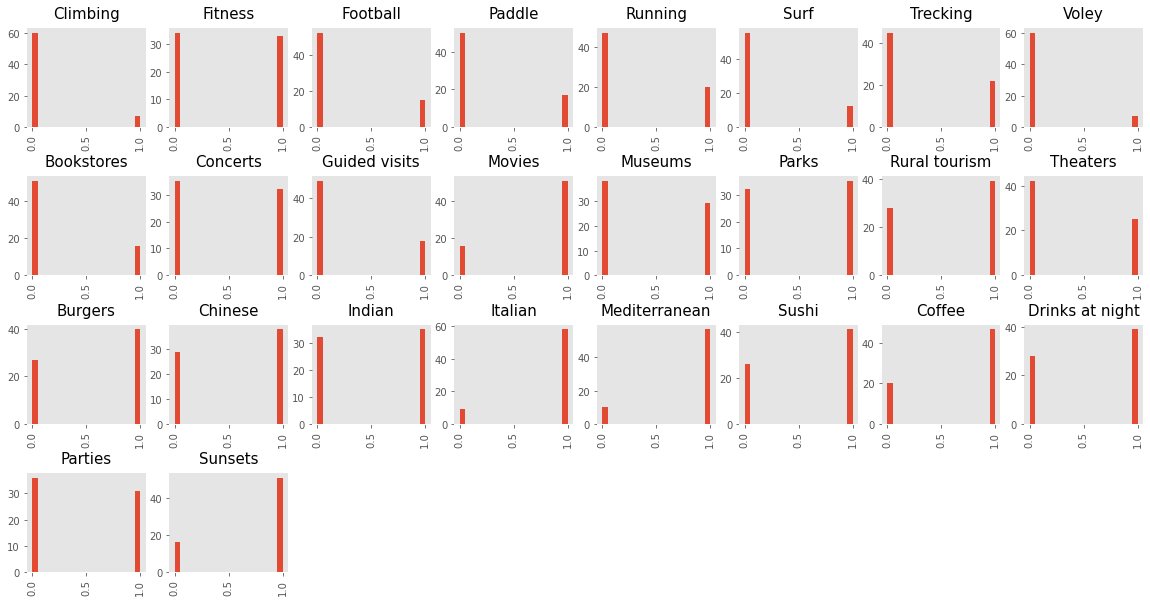

In [133]:
from broomlib import visualization as vis
vis.grid_displots(df_ohe, figsize=(20, 10), cols=8, bins=20, fontsize=15, y_space=0.5, style='ggplot')

## KMeans notebook de clase

In [112]:
kmeans_k = [KMeans(n_clusters=k, random_state=42).fit(df_ohe) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_k]

C:\Users\casiopa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [127]:
inertias

[352.2985074626866,
 319.2949183303085,
 292.04999999999984,
 280.329405034325,
 267.9621760592349,
 255.36888846447664,
 245.3690476190476,
 237.74981325863678,
 227.07393162393166]

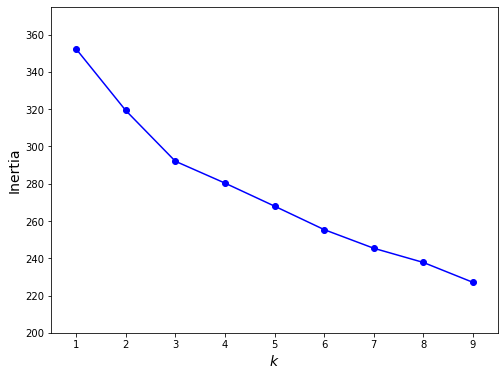

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([0.5, 9.5, 200, 375])
plt.show()

### Determining the optimal number of clusters

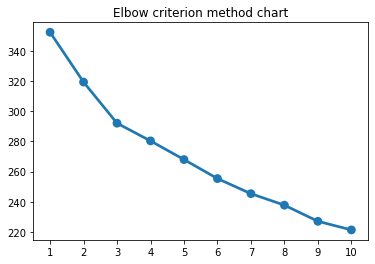

In [125]:
from sklearn.cluster import KMeans

# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ohe)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [126]:
sse

{1: 352.2985074626866,
 2: 319.2949183303085,
 3: 292.04999999999984,
 4: 280.329405034325,
 5: 267.9621760592349,
 6: 255.36888846447664,
 7: 245.3690476190476,
 8: 237.74981325863678,
 9: 227.07393162393166,
 10: 221.36373626373634}

### Building segmentation with k-means clustering

In [155]:
# Initializing `KMeans` with 4 clusters
kmeans=KMeans(n_clusters=3, random_state=123)

# Fitting the model on the pre-processed dataset
kmeans.fit(df_ohe)

# Assigning the generated labels to a new column
df_kmeans3 = df_ohe.assign(segment = kmeans.labels_)


### K-means segmentation averages

In [163]:
kmeans3_averages = df_kmeans3.groupby(['segment']).mean().round().astype('int')
print(kmeans3_averages.T)

segment          0  1  2
Climbing         0  0  0
Fitness          1  0  1
Football         0  0  0
Paddle           0  0  0
Running          0  0  0
Surf             0  0  0
Trecking         1  0  0
Voley            0  0  0
Bookstores       0  0  0
Concerts         1  0  1
Guided visits    1  0  0
Movies           1  1  1
Museums          1  0  0
Parks            1  0  1
Rural tourism    1  0  0
Theaters         1  0  0
Burgers          1  0  1
Chinese          1  0  1
Indian           1  0  0
Italian          1  1  1
Mediterranean    1  1  1
Sushi            1  0  1
Coffee           1  1  1
Drinks at night  0  0  1
Parties          0  0  1
Sunsets          1  1  1


#### Average K-means segmentation attributes

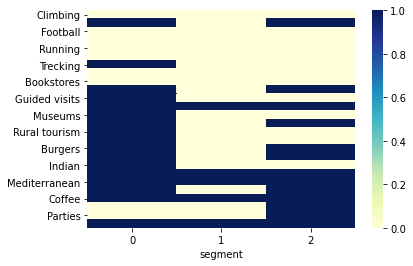

In [164]:
sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')
plt.show()

## Save trained model

In [171]:
# Save model as pickle file
dump(kmeans, "model.pkl")

['model.pkl']

### Alternative segmentation with NMF

Non-negative matrix factorization algorithm (NMF) works well with sparse customer by product matrices that are typical in the e-commerce or retail space. 

In [138]:
from sklearn.decomposition import NMF

# Initialize NMF instance with 4 components
nmf = NMF(4)

# Fit the model on the wholesale sales data
nmf.fit(df_ohe)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=df_ohe.columns)

### NMF segmentation averages

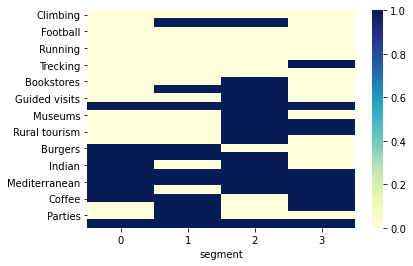

In [140]:
# Extract the features matrix W which we will use to extract the hard segment assignment
# Create the W matrix
W = pd.DataFrame(data=nmf.transform(df_ohe), columns=components.index)
W.index = df_ohe.index

# Assign the column name where the corresponding value is the largest
df_nmf4 = df_ohe.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf4_averages = df_nmf4.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf4_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()
